In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [ ]:
df=pd.read_csv("/content/Kolkata_Booking_Data.xlsx - Sheet1.csv");
df.shape;
df.dtypes;
df.info();
print(df.describe());
print(df);
df['Date']=pd.to_datetime(df['Date']);
print(df.head(10));
df_accepted=df[df['CANCELLED']==0];
print(df_accepted);
df_accepted.drop(['Reason for cancelling by Driver','Reason for cancelling by Customer','Incomplete Rides Reason'],axis=1,inplace=True);
for column in df_accepted.columns:
    if (df_accepted[column] == 0).any():
        df_accepted.drop(column, axis=1, inplace=True)
print(df_accepted);
df_Canceldata=df[df['CANCELLED']==1];
print(df_Canceldata)

                    Date   Time  Booking ID Booking Status Customer ID  \
0    2023-11-28 00:00:00  11:47  BID1293019         Failed    CID27080   
1    2023-11-10 00:00:00  16:29  BID3709820         Failed    CID85938   
2    2023-11-11 00:00:00  05:01  BID2744057         Failed    CID69712   
3    2023-11-22 00:00:00  07:24  BID2437940         Failed    CID58856   
5    2023-11-14 00:00:00  04:36  BID6369776         Failed    CID33065   
..                   ...    ...         ...            ...         ...   
979  2023-11-23 00:00:00  02:24  BID2371605         Failed    CID63833   
986  2023-11-18 00:00:00  18:35  BID7792073         Failed    CID61593   
994  2023-11-09 00:00:00  18:00  BID5388273         Failed    CID44749   
996  2023-11-10 00:00:00  21:31  BID1554485         Failed    CID73379   
997  2023-11-14 00:00:00  16:51  BID5196111         Failed    CID76556   

    Vehicle Type Pickup Location Drop Location  Avg VTAT  Avg CTAT  ...  \
0    Prime Sedan         Area-32    

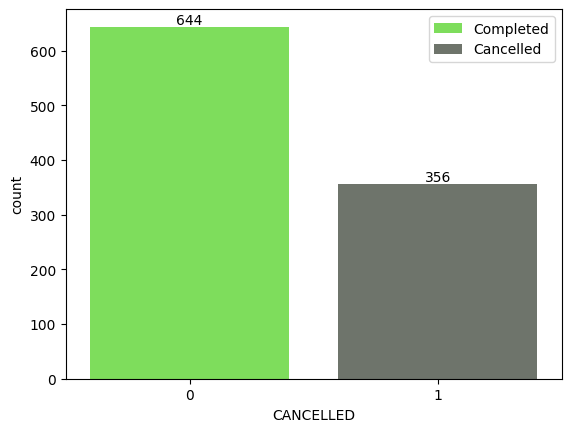

In [ ]:
ax = sns.countplot(x=df['CANCELLED'], data=df, hue=df['CANCELLED'], palette=['#74f246','#6d756a'])
for i in ax.containers:
    ax.bar_label(i);
ax.legend(['Completed','Cancelled']);

<ipython-input-190-a03731bbe06a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x=df_accepted['Vehicle Type'],y=df_accepted['Booking Value'],data=df_accepted,estimator=sum,palette=['#82f75c','#6d756a'],ci=None);
<ipython-input-190-a03731bbe06a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=df_accepted['Vehicle Type'],y=df_accepted['Booking Value'],data=df_accepted,estimator=sum,palette=['#82f75c','#6d756a'],ci=None);
<ipython-input-190-a03731bbe06a>:1: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x=df_accepted['Vehicle Type'],y=df_accepted['Booking Value'],data=df_accepted,estimator=sum,palette=['#82f75c','#6d756a'],ci=None);


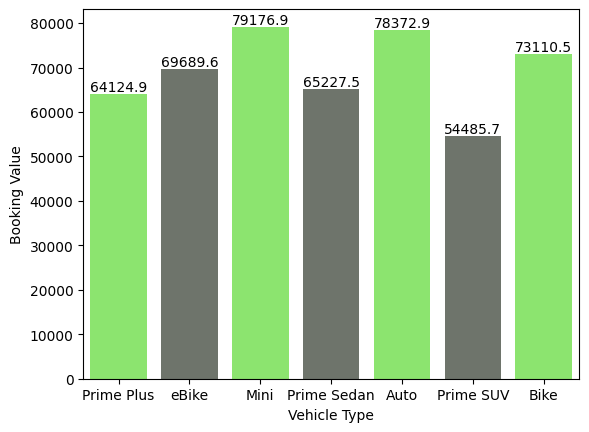

In [ ]:
ax=sns.barplot(x=df_accepted['Vehicle Type'],y=df_accepted['Booking Value'],data=df_accepted,estimator=sum,palette=['#82f75c','#6d756a'],ci=None);
for i in ax.containers:
    ax.bar_label(i);


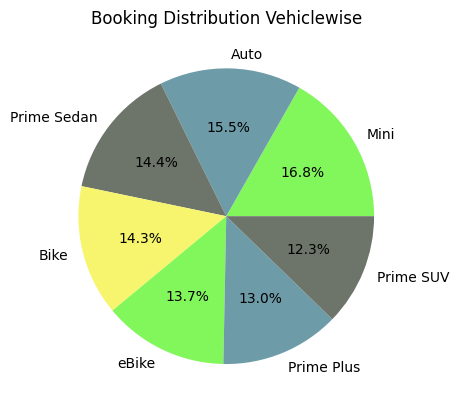

In [ ]:
plt.pie(df_accepted['Vehicle Type'].value_counts(),labels=df_accepted['Vehicle Type'].value_counts().index,autopct='%1.1f%%',colors=['#82f75c','#6d9ca8','#6d756a','#f7f56d'])
plt.title('Booking Distribution Vehiclewise');

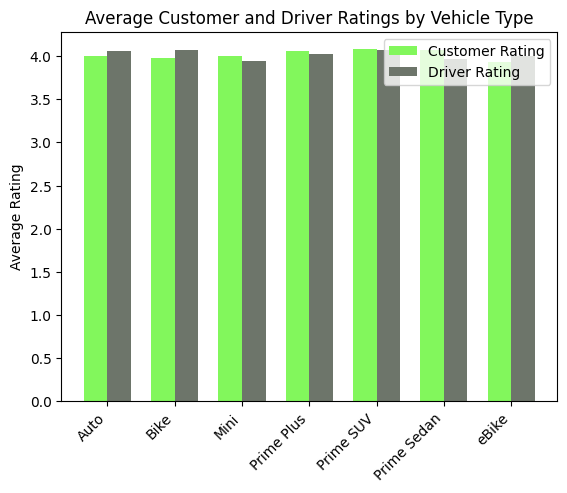

In [ ]:

grouped_data = df.groupby('Vehicle Type')[['Customer Rating', 'Driver Ratings']].mean().reset_index()

vehicle_types = grouped_data['Vehicle Type'].tolist()
customer_ratings = grouped_data['Customer Rating'].tolist()
driver_ratings = grouped_data['Driver Ratings'].tolist()

# Create grouped bar chart
bar_width = 0.35
x_pos = np.arange(len(vehicle_types))
fig, ax = plt.subplots()
ax.bar(x_pos, customer_ratings, width=bar_width, label='Customer Rating', color='#82f75c')
ax.bar(x_pos + bar_width, driver_ratings, width=bar_width, label='Driver Rating', color='#6d756a')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(vehicle_types)
ax.set_ylabel('Average Rating')
ax.set_title('Average Customer and Driver Ratings by Vehicle Type')
ax.legend()
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.show()

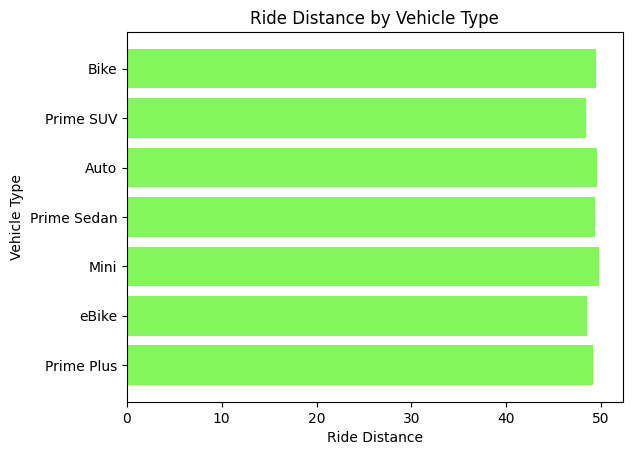

In [ ]:
ax=plt.barh(df_accepted['Vehicle Type'],df_accepted['Ride Distance'],color='#82f75c');
plt.xlabel('Ride Distance');
plt.ylabel('Vehicle Type');
plt.title('Ride Distance by Vehicle Type');


<ipython-input-192-9ce3c15c681a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_Canceldata['Incomplete Rides Reason'], data=df_Canceldata, palette=['#82f75c','#6d756a'])
<ipython-input-192-9ce3c15c681a>:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=df_Canceldata['Incomplete Rides Reason'], data=df_Canceldata, palette=['#82f75c','#6d756a'])


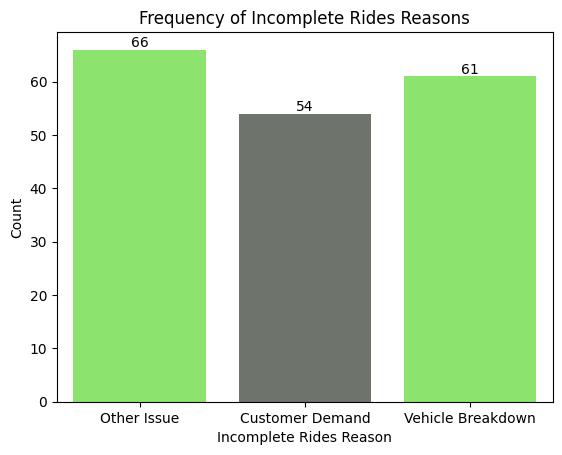

In [ ]:

df['Incomplete Rides Reason'].fillna("Done", inplace=True)
ax = sns.countplot(x=df_Canceldata['Incomplete Rides Reason'], data=df_Canceldata, palette=['#82f75c','#6d756a'])

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Incomplete Rides Reason')
plt.ylabel('Count')
plt.title('Frequency of Incomplete Rides Reasons')

plt.show()

<ipython-input-185-26a034b13575>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='Vehicle Type',y='CANCELLED',hue='Cancelled Rides by Customer',data=df_Canceldata,estimator=sum,palette=['#82f75c','#6d756a'],ci=None);


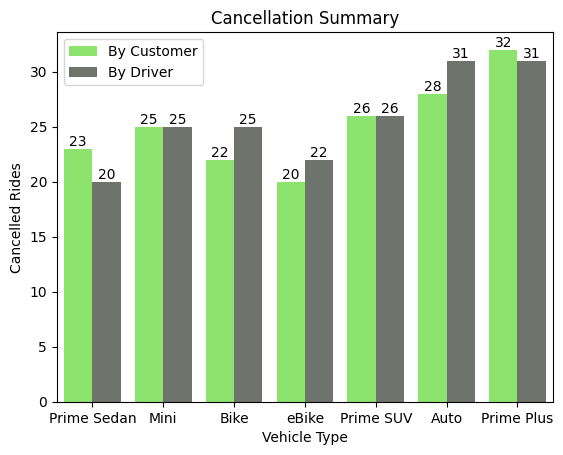

In [ ]:
ax=sns.barplot(x='Vehicle Type',y='CANCELLED',hue='Cancelled Rides by Customer',data=df_Canceldata,estimator=sum,palette=['#82f75c','#6d756a'],ci=None);
for i in ax.containers:
    ax.bar_label(i)
ax.legend(['By Customer','By Driver']);
plt.title('Cancellation Summary');
plt.xlabel('Vehicle Type');
plt.ylabel('Cancelled Rides');